In [5]:
# ***POLYNOMIAL LINEAR REGRESSION ***

# ***Data Preprocessing***
# ***Importing libraries***
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# ***Importing the dataset*** 
df = pd.read_csv('Position_Salaries.csv')

# The position values are already encoded in the level columns from 1-10
# So there is no need for encoding
    # Feature Matrix
X = df.iloc[:, 1:2].values
    # 1:2 -> so as to make it a matrix and not a vector
    
    # Dependent variable vector
y = df.iloc[:, -1:].values

# We have not done the splitting as we have very little data and we want to learn the maximum info
# and we want to make accurate prediction
# We don't do feature scaling too

In [6]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
df.dtypes

Position    object
Level        int64
Salary       int64
dtype: object

In [7]:
# *** Fitting Linear Regression to the model***
    # We do this so, we can compare the result with the polynomial regression model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
# ***Fitting Polynomial Regression to the dataset***
    # First we'll create the matrix consisting of polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree= 4)
X_poly = poly_reg.fit_transform(X)
    # This also adds the constant 1 column at index 0, which we require for B_o in our equation
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

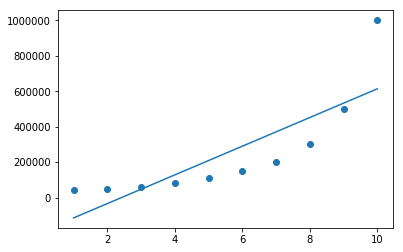

In [10]:
plt.scatter(df['Level'], df['Salary'])
plt.plot(X, lin_reg.predict(X))

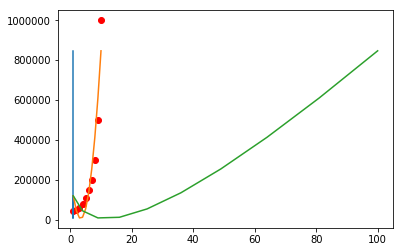

In [16]:
plt.scatter(df['Level'], df['Salary'], color ="red")
plt.plot(X_poly, lin_reg_2.predict(X_poly))

In [15]:
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

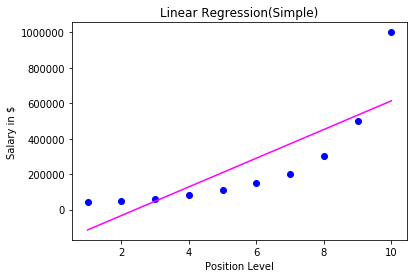

In [19]:
# ***Visualizing the Linear Regression Result***
plt.scatter(X, y, color = "blue")
plt.plot(X, lin_reg.predict(X), color = "magenta")
plt.title("Linear Regression(Simple)")
plt.xlabel("Position Level")
plt.ylabel("Salary in $")
plt.show()

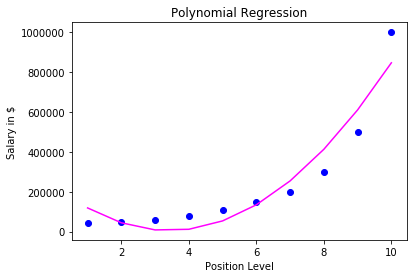

In [20]:
#  ***Visulaizing the Polynomial Regression Result***
plt.scatter(X, y, color = "blue") # Keeping the real observation points
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = "magenta") # for degree=2
    # We have done this so we can change only X when we want to check for any new feature matrix
    # or we want to change the degree
plt.title("Polynomial Regression")
plt.xlabel("Position Level")
plt.ylabel("Salary in $")
plt.show()

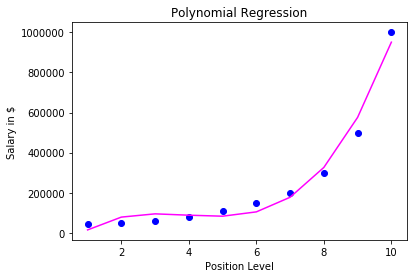

In [25]:
#  ***Visulaizing the Polynomial Regression Result***
plt.scatter(X, y, color = "blue") # Keeping the real observation points
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = "magenta") # for degree=3
    # We have done this so we can change only X when we want to check for any new feature matrix
    # or we want to change the degree
plt.title("Polynomial Regression")
plt.xlabel("Position Level")
plt.ylabel("Salary in $")
plt.show()

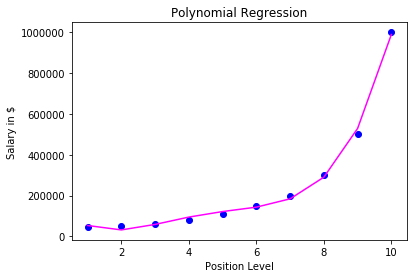

In [27]:
#  ***Visulaizing the Polynomial Regression Result***
plt.scatter(X, y, color = "blue") # Keeping the real observation points
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = "magenta") # for degree=4
    # We have done this so we can change only X when we want to check for any new feature matrix
    # or we want to change the degree
plt.title("Polynomial Regression")
plt.xlabel("Position Level")
plt.ylabel("Salary in $")
plt.show()

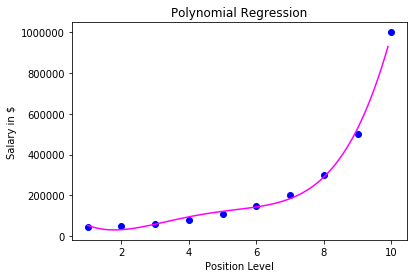

In [30]:
# Now to make the curve smooth, we add a number of small values between the levels 
X_grid = np.arange(min(X), max(X), 0.1)
# Reshaping it
X_grid = X_grid.reshape((len(X_grid), 1))
#  ***Visulaizing the Polynomial Regression Result***
plt.scatter(X, y, color = "blue") # Keeping the real observation points
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = "magenta") # for degree=4
    # We have done this so we can change only X when we want to check for any new feature matrix
    # or we want to change the degree
plt.title("Polynomial Regression")
plt.xlabel("Position Level")
plt.ylabel("Salary in $")
plt.show()

In [63]:
# ***Predicting a new result with Linear Regression***
arr = np.array([[6.5]])
arr.reshape((-1,1))
lin_reg.predict(arr)

array([[330378.78787879]])

In [64]:
arr.shape

(1, 1)

In [66]:
# ***Predicting a new result with Polynomial Regression***
lin_reg_2.predict(poly_reg.fit_transform(arr))

array([[158862.45265155]])